In [1]:
from tensorflow.keras.datasets import cifar10

# CIFAR-10データを読み込む
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [2]:
from tensorflow.keras import utils

# 訓練データのピクセル値を0～1の範囲に変換
X_train = X_train/255.0
# テストデータのピクセル値を0～1の範囲にスケーリング
X_test = X_test/255.0

# 正解ラベルを10クラスのワンホット表現に変換
classes = 10
Y_train = utils.to_categorical(y_train, classes)
Y_test = utils.to_categorical(y_test, classes)

In [3]:
# 第1層：畳み込み層1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D

# CNNモデルの基盤を構築
model = Sequential()

# （第1層）畳み込み層1
model.add(
    Conv2D(
        filters=32,                # フィルターの数は32
        kernel_size=(3, 3),        # 3×3のフィルターを使用
        input_shape=(32, 32, 3),   # 入力データの形状
        padding='same',            # ゼロパディングを行う
        activation='relu'          # 活性化関数はReLU
        ))

In [4]:
# （第2層）畳み込み層2
model.add(
    Conv2D(
        filters=32,                # フィルターの数は32
        kernel_size=(3, 3),        # 3×3のフィルターを使用
        padding='same',            # ゼロパディングを行う
        activation='relu'          # 活性化関数はReLU
        ))

In [5]:
# （第3層）プーリング層1：ウィンドウサイズは2×2
from tensorflow.keras.layers import MaxPooling2D, Dropout

model.add(MaxPooling2D(pool_size=(2, 2)))
# ドロップアウトは25％
model.add(Dropout(0.25))

In [6]:
# （第4層）畳み込み層3
model.add(
    Conv2D(
        filters=64,         # フィルターの数は64
        kernel_size=(3, 3), # 3×3のフィルターを使用
        padding='same',     # ゼロパディングを行う
        activation='relu'   # 活性化関数はReLU
        ))

In [7]:
# （第5層）畳み込み層4
model.add(
    Conv2D(
        filters=64,          # フィルターの数は64
        kernel_size=(3, 3),  # 3×3のフィルターを使用
        padding='same',      # ゼロパディングを行う
        activation='relu'    # 活性化関数はReLU
        ))

In [8]:
# （第6層）プーリング層2：ウィンドウサイズは2×2
model.add(
    MaxPooling2D(pool_size=(2, 2)
    ))
# ドロップアウトは25％
model.add(Dropout(0.25))

In [9]:
# Flatten層　4階テンソルから2階テンソルに変換
from tensorflow.keras.layers import Flatten

model.add(Flatten())

In [10]:
# （第7層）全結合層
from tensorflow.keras.layers import Dense

model.add(
    Dense(512,                     # ニューロン数は512
          activation='relu'))      # 活性化関数はReLU
          

# ドロップアウトは50％
model.add(Dropout(0.5))

In [11]:
# （第8層）出力層
model.add(
    Dense(
        classes,                 # 出力層のニューロン数はclasses(値は10)
        activation='softmax'))   # 活性化関数はソフトマックス

In [12]:
# Sequentialオブジェクトのコンパイル
from tensorflow.keras.optimizers import Adam

model.compile(
    loss='categorical_crossentropy', # 損失関数は交差エントロピー誤差
    optimizer=Adam(),                # 最適化をAdamアルゴリズムで行う
    metrics=['accuracy']             # 学習評価として正解率を指定
    )

In [13]:
# モデルのサマリを表示
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [14]:
# 学習を行う
history = model.fit(
    X_train,       # 訓練データ
    Y_train,       # 正解ラベル 
    batch_size=50, # 勾配計算に用いるミニバッチの数
    epochs=30,     # 学習回数
    verbose=1,     # 学習の進捗状況を出力する
    validation_data=(
        X_test, Y_test) # テストデータの指定
    )

Epoch 1/30
1000/1000 [==============================] - 92s 91ms/step - loss: 1.5291 - accuracy: 0.4376 - val_loss: 1.1644 - val_accuracy: 0.5861
Epoch 2/30
1000/1000 [==============================] - 93s 93ms/step - loss: 1.0810 - accuracy: 0.6142 - val_loss: 0.9402 - val_accuracy: 0.6708
Epoch 3/30
1000/1000 [==============================] - 92s 92ms/step - loss: 0.9147 - accuracy: 0.6757 - val_loss: 0.8326 - val_accuracy: 0.7051
Epoch 4/30
1000/1000 [==============================] - 92s 92ms/step - loss: 0.8098 - accuracy: 0.7141 - val_loss: 0.7630 - val_accuracy: 0.7254
Epoch 5/30
1000/1000 [==============================] - 92s 92ms/step - loss: 0.7463 - accuracy: 0.7364 - val_loss: 0.7187 - val_accuracy: 0.7523
Epoch 6/30
1000/1000 [==============================] - 93s 93ms/step - loss: 0.6917 - accuracy: 0.7560 - val_loss: 0.6657 - val_accuracy: 0.7689
Epoch 7/30
1000/1000 [==============================] - 93s 93ms/step - loss: 0.6419 - accuracy: 0.7735 - val_loss: 0.6609 -

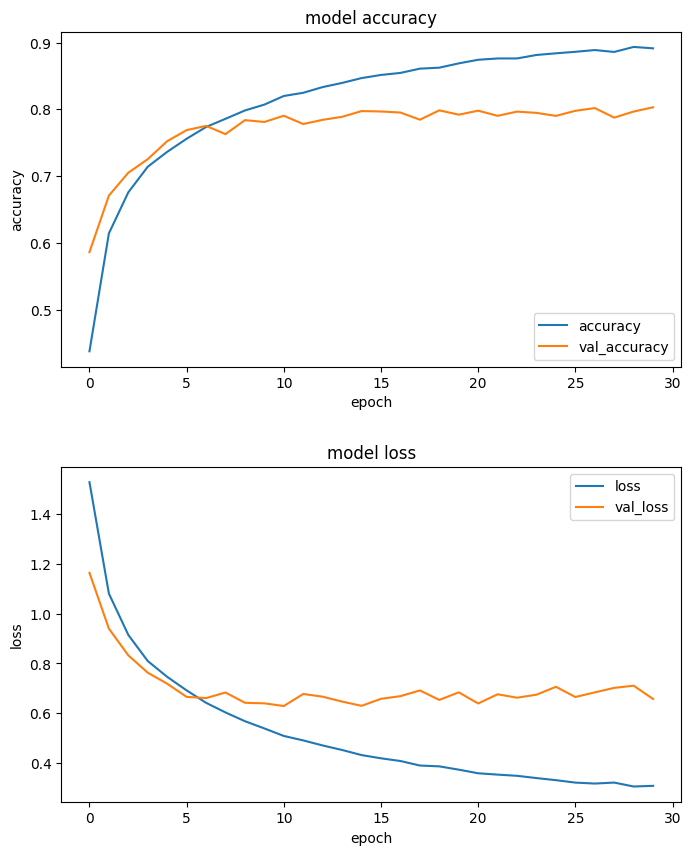

In [15]:
# 学習過程をグラフにする

import matplotlib.pyplot as plt

def plot_history(history):
    plt.ﬁgure(ﬁgsize=(8, 10))
    plt.subplots_adjust(hspace=0.3)
    # 精度の履歴をプロット
    plt.subplot(2, 1, 1)
    plt.plot(history.history['accuracy'],"-",label="accuracy")
    plt.plot(history.history['val_accuracy'],"-",label="val_accuracy")
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc="lower right")

    # 損失の履歴をプロット
    plt.subplot(2, 1, 2)
    plt.plot(history.history['loss'],"-",label="loss",)
    plt.plot(history.history['val_loss'],"-",label="val_loss")
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='upper right')
    plt.show()
    
# 学習の過程をグラフにする
plot_history(history)